In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


<Figure size 1000x400 with 0 Axes>

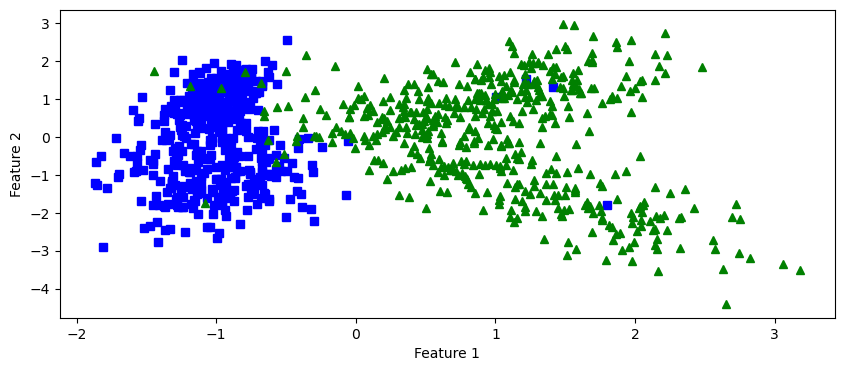

In [11]:
data = pd.read_csv('Example_classification.csv', index_col=0)

X = data[['x1','x2']].values
y = data[['target']].values.ravel() #ravel() makes the column vector into a 1d array !
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show();


In [15]:
#Let's train a linear model with default parameters 
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=random_seed)


#create pipeline that includes scaling and gradient descent
reg = Pipeline([('scaler', StandardScaler()),
                ('SGD', SGDClassifier())])
#fit the model with data
reg.fit(X_train,y_train);

#make a prediction 
y_pred = reg.predict(X_test)

How do we evaluate the quality of a model?

### Option 1: Accuracy

Accuracy is a measure of the number of classifications a model correctly predicts divided by the total number of predictions made.

$$
Accuracy = \left[1 - \frac{1}{N}\sum(abs(y[i]-\hat{y}[i])\right]x 100\%
$$

However, if the data includes a lot of samples from one class, then the accuracy will be skewed and unreliable. To trust the accuracy score, you need to make sure the classess are properly represented in the dataset...

### Option two: Confusion Matrix 

The confusion matrix is visual representation of the number of correct and incorrect predictions made by the model broken dowm by each class. 

<div style="text-align:center">
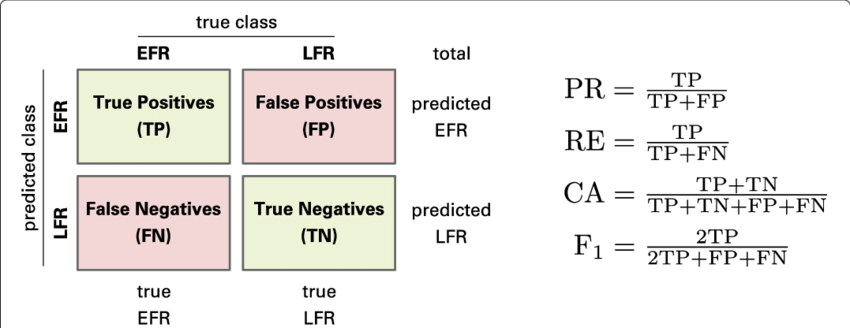
</div>


- **True Positives (TP)**: Number of instances of class 0 that the model classified as class 0 
- **True Negatives (TN)**: Number of instances of class 0 that the model classified as class 1
- **False Negatives (FN)**: Number of instances of class 1 that the model classified as class 0 
- **False Positives (FP)**: Number of instances of class 1 that the model classified as class 1 


### Option three: Precision, Recall, and F1 score

Precision, recall, and F1 score are measured derived from the confusion matrix. They completely characterize a classification model 


$$
Precision = \frac{TP}{TP+FP}
$$

$$
Recall = \frac{TP}{TP+FN}
$$

$$
F1 = \frac{2TP}{2TP+FP+FN}
$$


### Option Four: Receiver Operating Characteristic (ROC) Curve

The ROC curve evaluates the model behaviour for different classification thresholds. The previous measures assume that a classification was already made; in contrast, the ROC curve works with the classification probabilities, and helps to determine the best threshold to maximize the number of True Positives. 

<div style="text-align:center">
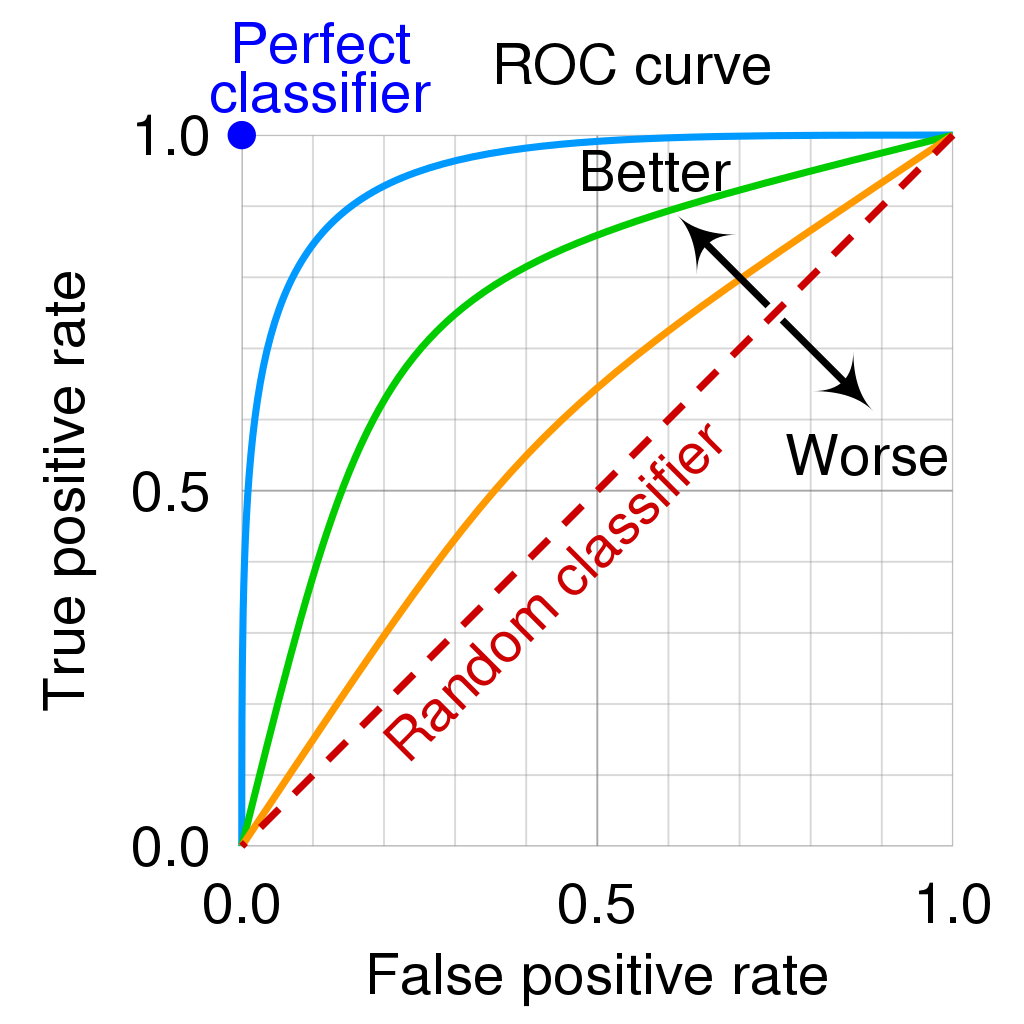
</div>


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix

#accuracy:
acc = accuracy_score(y_test, y_pred)
print(f'The model accuracy is : {acc*100}%')


The model accuracy is : 97.33333333333334%


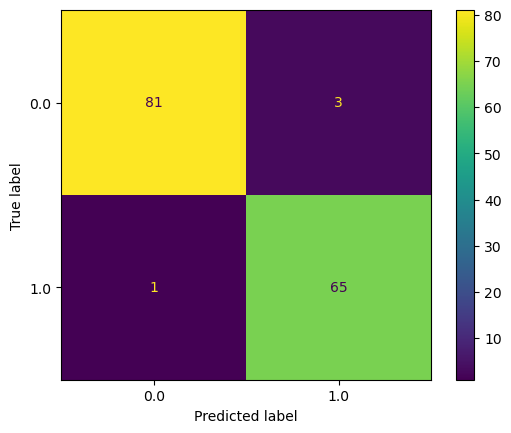

In [40]:
#confusion matrix
plot_confusion_matrix(reg, X_test, y_test) 
plt.show();

In [41]:
#precision, recall, and f1 score
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision = {prec} \nRecall = {rec} \nF1-Score = {f1}')

Precision = 0.9558823529411765 
Recall = 0.9848484848484849 
F1-Score = 0.9701492537313432


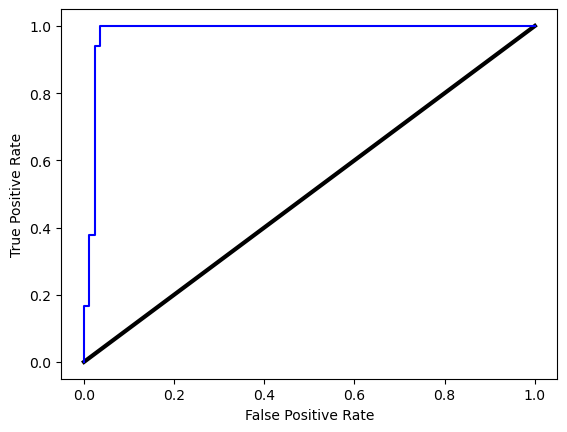

In [49]:
#ROC curve
#for the ROC curve we cannot use the model predictions directly. We have to use the decision function 
#(that is, we cannot apply a threshold to get a class)
dec_func =  reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test,dec_func)
plt.plot([0,1],[0,1], 'k', lw =3)
plt.plot(fpr, tpr, 'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'Area Under the Curve = {auc()}')
plt.show()

In [50]:
auc??